<a href="https://colab.research.google.com/github/Vlasovets/Deep_learning_course_assistantship/blob/master/Text_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced topics in User Interfaces

## 🧐 **Learning goals** 
The tutorial covers the topics explained during the lecture in the following parts:
1.   to continue with sequence classification with RNNs
2.   to get introduced with one-hot encoding
3.   to train and test models on the given sample of text
4.   to work with different parameters of the model

## 🔑1. Introduction

### 📚 Text classification

The chapter of [Animal Farm](https://en.wikipedia.org/wiki/Animal_Farm) by George Orwell is provided for this exercise. 

We would like to build a model able to reproduce the text likely to the given dataset.


In [9]:
from IPython.display import HTML
HTML('<img src="https://media.giphy.com/media/Aw0kXVxZDbkTC/giphy.gif">')

🥒
[Pickle](https://docs.python.org/3/library/pickle.html) is used for serializing and de-serializing a Python object structure. Any object in python can be 'pickled' so that it can be saved on disk. What pickle does is that it serializes the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

<font color=orange>Advantages</font> of using Pickle Module: 

* Recursive objects (objects containing references to themselves): Pickle keeps track of the objects it has already serialized, so later references to the same object won’t be serialized again.

* Object sharing (references to the same object in different places): pickle stores the object once, and ensures that all other references point to the master copy. Shared objects remain shared, which can be very important for mutable objects.

* User-defined classes and their instances: pickle can save and restore class instances transparently. The class definition must be importable and live in the same module as when the object was stored.

🌶️ Some hot models we are going to use today:

* In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: the tf.keras.<font color=lightblue>Sequential</font> model which we have already seen in the previous exercise, but you can refresh your memory [here](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

* From the lecture we remember that <font color=pink>LSTM</font> is a special recurrent neural network which is explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn! Do not forget to check this [link](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) if you want more LSTMs in your life.

* The name <font color=yellow>Dense</font> suggests that layers are fully connected by the neurons in a network layer. Each neuron in a layer receives input from all the neurons present in the previous layer—thus, they’re densely connected.
In other words, the dense layer is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer. More information can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).



In [0]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pickle
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM

## 🔨 2. Data preparation

There are several steps we have to follow before the actual training of our model:

* Split the text by chunks of words.

We would like to remove all unnecessary symbols from the text and work only with separate words. 
* Encode the words from categorical to numerical variables.

The machine cannot understand words and therefore it needs numerical values so as to make it easier for the machine to process the data. To apply any type of algorithm to the data, we need to convert the categorical data to numbers. To achieve this, one hot ending is one way as it converts categorical variables into binary vectors.

In [16]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/2736/0*T5jaa2othYfXZX9W.", width=700, height=200)

## ⚡3. Model Training


Softmax function, a wonderful activation function that turns numbers into probabilities that sum to one. Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes.

Here, we use *optimizer='rmsprop'*, but you can try [more](https://keras.io/optimizers/#rmsprop) and compare the results to get additional points.

Chosen loss function ([categorical crossentropy](https://keras.io/losses/)) and the type of metrics ([accuracy](https://en.wikipedia.org/wiki/Precision_and_recall)) have been discussed in previous exercises, the links are provided in case you would like to refresh those lessons.



Here, you will find a video explanation of LSTM since this model can tricky to understand. The video is a little bit long (26 mins), so it is not mandatory to watch it fully if you feel confident with LSTM.

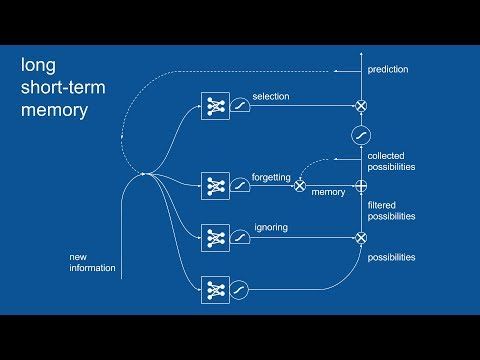

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('WCUNPb-5EYI')

In [2]:
# Define a fixed sequence length for training.
SEQUENCE_LENGTH = 40

if __name__ == '__main__':
    # The saved model file will be named like the dataset file.
    dataset_file = 'animal-farm.txt'
    # Do some text preprocessing.
    text_source = open(dataset_file).read().lower().replace('\n', ' ')
    text_source = ' '.join(text_source.split())

    # Create vocabulary. We need to look up chars by index and vice versa.
    chars = sorted(list(set(text_source)))
    char_indices = dict((c, i) for i, c in enumerate(chars))

    # Create text chunks and their expected prediction.
    sentences = []
    char_step = 3
    next_char = []
    for i in range(0, len(text_source) - SEQUENCE_LENGTH, char_step):
        sentences.append(text_source[i: i + SEQUENCE_LENGTH])
        next_char.append(text_source[i + SEQUENCE_LENGTH])

    # Create 1-hot encoded training data.
    X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
    y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(sentences):
        for t, char in enumerate(sentence):
            X[i, t, char_indices[char]] = 1
        y[i, char_indices[next_char[i]]] = 1

    # Define the model.
    model = Sequential()
    model.add(LSTM(SEQUENCE_LENGTH, input_shape=(SEQUENCE_LENGTH, len(chars))))
    model.add(Dense(len(chars), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    # Train and save the model.
    model.fit(X, y, validation_split=0.2, batch_size=128, epochs=20)
    model.save('{}.h5'.format(dataset_file))
    # Save also the vocabulary used to train the model.
    with open('{}.voc'.format(dataset_file), 'wb') as f:
        pickle.dump(chars, f, protocol=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45129 samples, validate on 11283 samples
Epoch 1/20
45129/45129 [==============================] - 16s 360us/sample - loss: 2.9284 - acc: 0.1800 - val_loss: 2.8064 - val_acc: 0.2357
Epoch 2/20
45129/45129 [==============================] - 16s 344us/sample - loss: 2.6527 - acc: 0.2715 - val_loss: 2.5235 - val_acc: 0.3157
Epoch 3/20
45129/45129 [==============================] - 15s 340us/sample - loss: 2.4280 - acc: 0.3262 - val_loss: 2.3604 - val_acc: 0.3338
Epoch 4/20
45129/45129 [==============================] - 16s 344us/sample - loss: 2.3148 - acc: 0.3386 - val_loss: 2.2760 - val_acc: 0.3508
Epoch 5/20
45129/45129 [==============================] - 16s 349us/sample - loss: 2.2463 - acc: 0.3553 - val_loss: 2.2168 - val_acc: 0.3684
Epoch 6/20
45129/45129 [==============================] - 16s 349us/sa

## 💎 4. Model testing

The heapq implements a min-heap sort algorithm suitable for use with Python’s lists. 

A <font color=brown>heap</font>  is a tree-like data structure where the child nodes have a sort-order relationship with the parents. Binary heaps can be represented using a list or array organized so that the children of element N are at positions 2*N+1 and 2*N+2 (for zero-based indexes). This layout makes it possible to rearrange heaps in place, so it is not necessary to reallocate as much memory when adding or removing items. 


More information on heapq library can be found [here](https://docs.python.org/2/library/heapq.html).

The commented lines 7,8 are necessary if you want to test your model in a separate file.

In [0]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pickle
import heapq
# from tensorflow.python.keras.models import load_model
# from text_train import SEQUENCE_LENGTH

Create dictionaries for characters and the model.

In [0]:
MODEL = None
CHARS = None
char_indices, indices_char = {}, {}

One-hot encoding of the test sample of the text.

In [0]:
def encode_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(CHARS)))
    for t, char in enumerate(text.lower()):
        x[0, t, char_indices[char]] = 1
    return x

Take elements which occures the most often in the observed data.

In [0]:
def sample(preds, top_n=1):
    preds = np.asarray(preds)
    # Extract the top_n elements with highest probability.
    return list(heapq.nlargest(top_n, range(len(preds)), preds.take))

We would like to predict the extension of the sentence until we meet a space.

🤔 You are encouraged to try different stops and see how the made-up text looks like. Do your results make sense?

In [0]:
def predict_completion(text):
    completion = ''
    while True:
        x = encode_input(text)
        preds = MODEL.predict(x).flatten()
        next_index = sample(preds).pop()
        next_char = indices_char[next_index]
        completion += next_char
        # Keep predicting until the end token.
        if next_char == ' ':
            return completion
        # Update source text.
        text = text[1:] + next_char

Transforming numeric representation 🔙 back to words using saved indexes of the characters.

In [0]:
def predict_completions(text, n_completions=3):
    x = encode_input(text)
    preds = MODEL.predict(x).flatten()
    next_indices = sample(preds, n_completions)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

 👑Resulting text prediction is here!

In [20]:
if __name__ == '__main__':
    dataset_file = 'animal-farm.txt'

    MODEL = load_model('{}.h5'.format(dataset_file))
    with open('{}.voc'.format(dataset_file), 'rb') as f:
        CHARS = pickle.load(f)

    char_indices = dict((c, i) for i, c in enumerate(CHARS))
    indices_char = dict((i, c) for i, c in enumerate(CHARS))

    # Our input sentences must have the same length used in training.
    seq = "One day, Julia secretly hands Winston a note confessing her love for him"
    seq = seq[0:SEQUENCE_LENGTH]

    completions = predict_completions(seq, n_completions=4)
    print(seq)
    print('---')
    for suggestion in completions:
        print(seq + suggestion)

One day, Julia secretly hands Winston a 
---
One day, Julia secretly hands Winston a dith 
One day, Julia secretly hands Winston a for 
One day, Julia secretly hands Winston a the 
One day, Julia secretly hands Winston a was 


## 🏁 5. Conclusion

Now, you know:

1.   how to classify sequences with an RNN model (e.g. LSTM)
2.   how to transform categorical features with one-hot encoding
3.   to work with different parameters of the model

Do not hesitate to ask questions at otorrent@mail.ru

Thank you for your attention and see you next exercise session!

